# **1. An introduction to [PyGMT](https://www.pygmt.org) for GeoScientists**

Welcome to the workshop!
Here in this [jupyter lab](https://jupyterlab.readthedocs.io) environment,
we'll go through some of the basics of loading the PyGMT library into Python,
and have a go at making some simple figures!

[PyGMT](https://www.pygmt.org/) is a [PyData](https://pydata.org/)
compatible package for analyzing and plotting time-series and gridded data.
It is an [open source](https://github.com/GenericMappingTools/pygmt) Python package
that aims to provide a more accessible interface to the popular
[Generic Mapping Tools](https://www.generic-mapping-tools.org) (GMT) library
used by Earth, Ocean and Planetary scientists worldwide.

If you encounter any problems, feel free to post a question on our
[forum](https://forum.generic-mapping-tools.org/).
Feature requests and bug reports are also welcome, just raise it as a
[Github issue](https://github.com/GenericMappingTools/pygmt/issues/new/choose)
and we'll try to sort it out as soon as possible!

## **Getting started**

We've done all the hard work [installing PyGMT](https://www.pygmt.org/dev/install) for you already.
So simply import the `pygmt` Python package, and that will give you access to
all the data processing and plotting modules.

Tip: Press `Shift+Enter` to run a code 'cell',
or click on the Play ► button above.
You can also add new cells using the Plus + button.

In [1]:
import pygmt

To make sure that things work, let's plot the GMT logo.

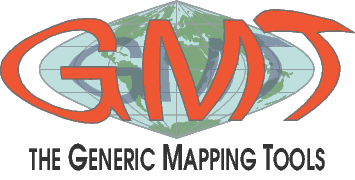

In [2]:
fig = pygmt.Figure()
fig.logo(D="x0/0+w3c")
fig.show()

Did it work?
If yes, then great!
In the following sections, we'll break things down step by step so you can follow along.

## **Making a map**

All figure generation in PyGMT is handled by the
[pygmt.Figure](https://www.pygmt.org/dev/api/generated/pygmt.Figure.html) class.
It has methods to add layers to your figure, like a basemap, coastlines, etc.

Start a new figure by creating a blank instance of `pygmt.Figure`:

In [3]:
fig = pygmt.Figure()

We gradually add layer elements to the figure using its methods.
Let's start by creating a [basemap](https://www.pygmt.org/dev/api/generated/pygmt.Figure.basemap)
focused on New Zealand with the following options:

- set the `region` to a suitable bounding box in the form of `[xmin, xmax, ymin, ymax]`.
- set the [`projection`](https://www.pygmt.org/dev/projections/) to Universal Transverse Mercator (U),
  and make the map 6 cm wide.
- set the map `frame` to have automatic tick marks using `True`.

In [4]:
fig.basemap(region=[165, 180, -49, -33], projection="U6c", frame=True)

Next, we'll use [coast](https://www.pygmt.org/dev/api/generated/pygmt.Figure.coast) to colour the land darkgreen and water lightblue.
You can find the full list of colour options [here](https://docs.generic-mapping-tools.org/latest/gmtcolors.html#list-of-colors).

In [5]:
fig.coast(land="darkgreen", water="lightblue")

We can then preview the figure directly in Jupyter using `show`.

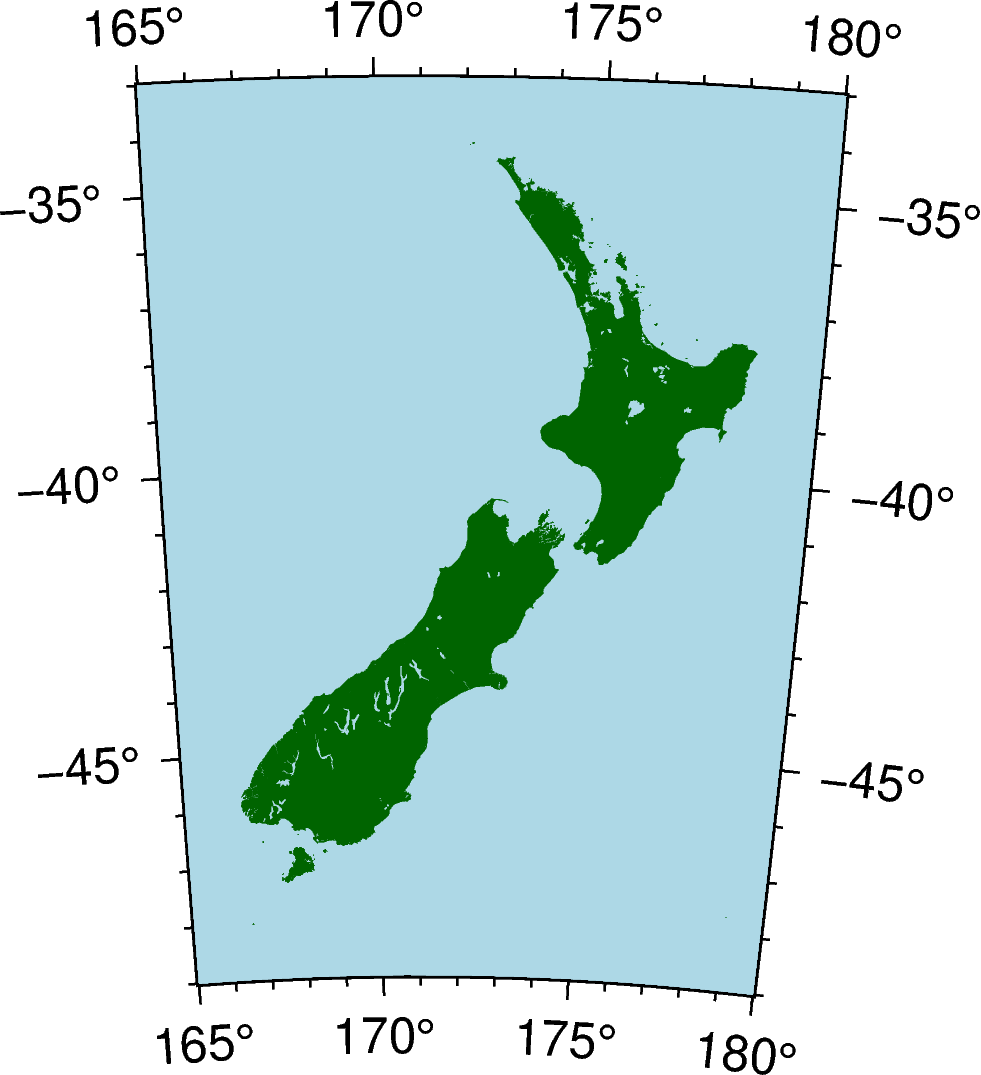

In [6]:
fig.show()

This is a fairly simple example, but you will find out that GMT is much more powerful than that!
Find out more about tweaking the coastline and borders at this
[tutorial](https://www.pygmt.org/dev/tutorials/coastlines.html).

For now though, let's proceed and see how we can add more colour to our map!

## **What a (colourful) relief**

As geoscientists, we're often interested in the Earth's terrain,
and a Digital Elevation Model (DEM) is a common element in many maps.

Let's have a go at making a map of Oceania showing the ocean bathymetry and land elevation.
We'll start by setting our `basemap` to focus on the Oceania region (=OC).
Our map frame will have tick marks at major and minor intervals (af),
and x and y axis labels on the 'W'est and 'S'outh sides only (WSne).

In [7]:
fig = pygmt.Figure()
fig.basemap(region="=OC", frame=["af", "WSne"])

GMT6 comes with a global Earth relief model ([SRTM15+V2](https://doi.org/10.1029/2019EA000658))
that can be accessed using special filenames like '@earth_relief_xxx'.
Here, we'll plot the 1 arc minute grid using [fig.grdimage](https://www.pygmt.org/dev/api/generated/pygmt.Figure.grdimage),
and explicitly use the 'geo' colormap to colour the terrain.

In [8]:
fig.grdimage(grid="@earth_relief_01m", cmap="geo")

We'll also add a [colorbar](https://www.pygmt.org/dev/api/generated/pygmt.Figure.colorbar) for good measure.
The `position` is set to be outside the map frame (J), at the Middle Right (MR) side.
The colorbar will automatically pick up the last colormap we used above,
but we can force the units to be in kilometres instead of the default metres using `cmap="+Uk"`.
We'll also use `frame` to add annotated tick marks at suitable intervals to the colorbar (af),
and set the label to be in units km (+lkm).

In [9]:
fig.colorbar(position="JMR", cmap="+Uk", frame=["af", "y+lkm"])

Finally, we call `show` again to display our map!

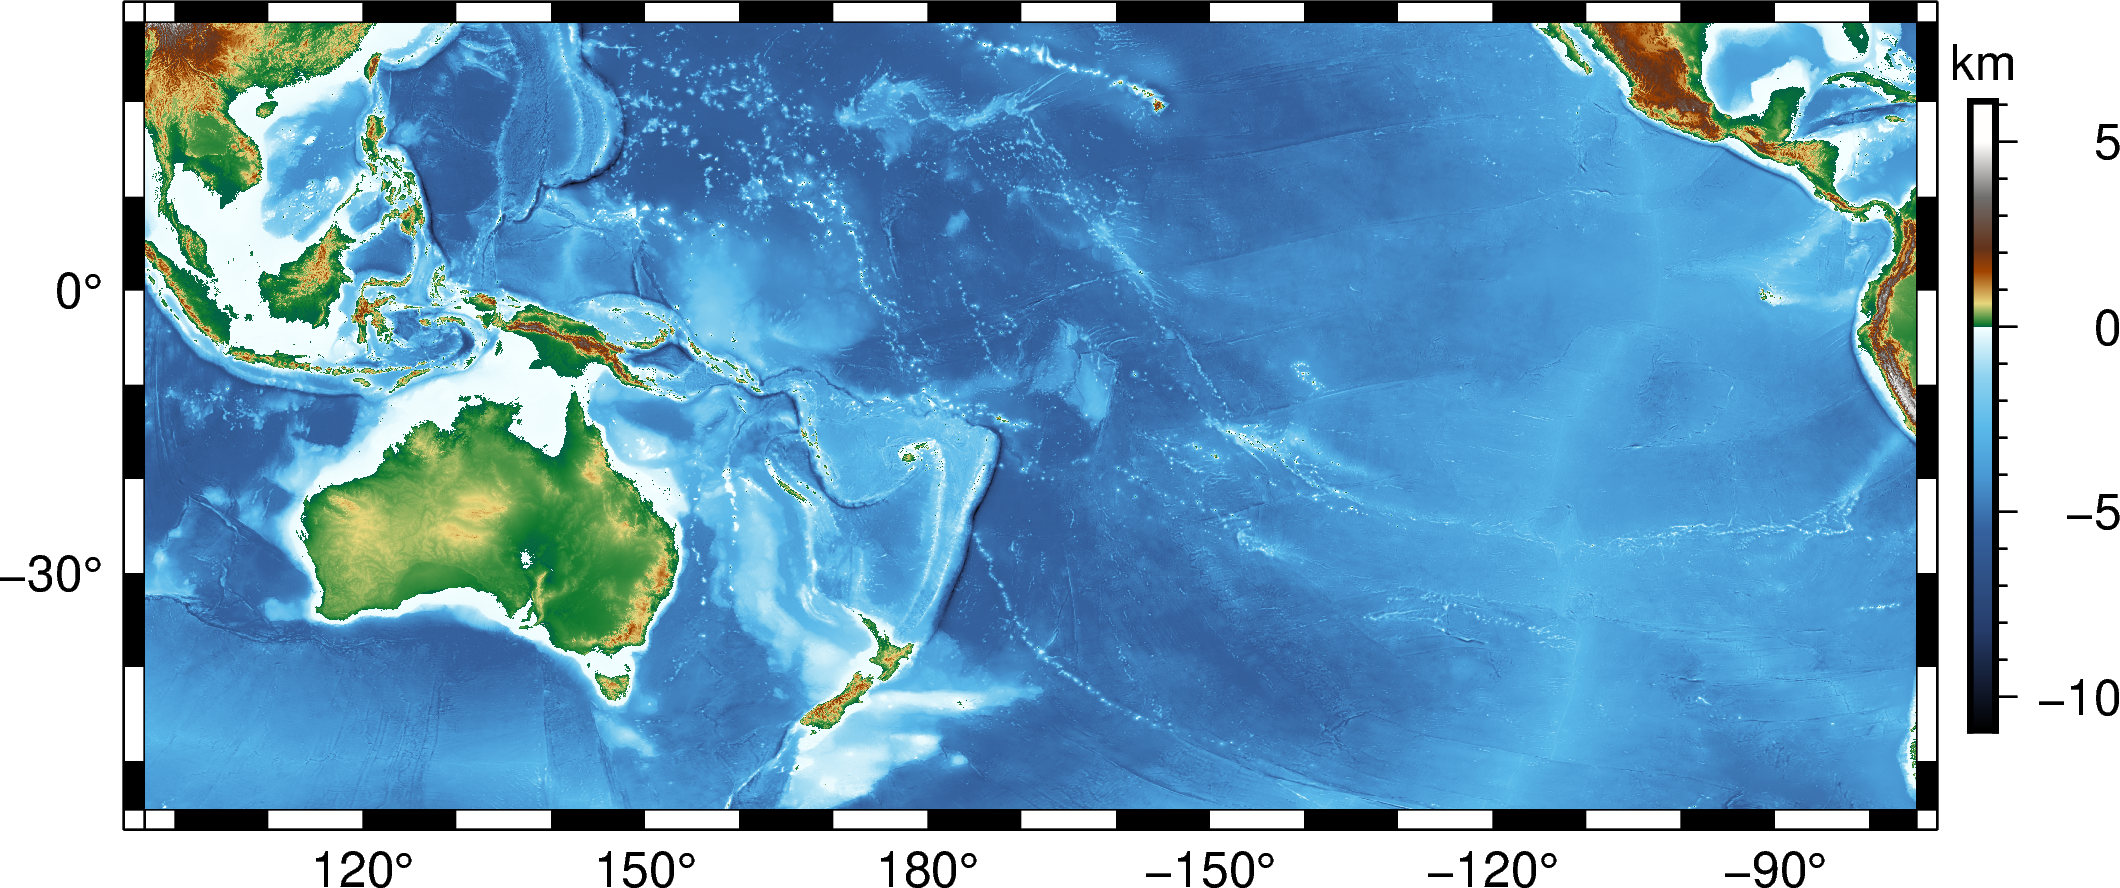

In [10]:
fig.show()

## **Exploration time - Make a map of where you came from!**

Take some time to produce a map of your own. Below are some ideas on what you can do.

Changing the **region** and grid **resolution**:

- You can change the country/territory in the `region` argument to another 2 letter code by
  following the [ISO 3166-1 alpha-2 convention](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Officially_assigned_code_elements).
  e.g. `region="NZ"` for New Zealand.
- If your region is interest is small (e.g. for a Pacific island) and the grid looks blocky,
  try using a higher resolution grid e.g. `grid="@earth_relief_30s"` with 30 arc second pixels
  (warning, this will take some time to download!).
- Advanced users can fine-tune the bounding box region by looking at https://docs.generic-mapping-tools.org/latest/gmt.html#r-full!

Pick another **colormap** and add a **hillshade**:

- Choose a different cmap, check out GMT's full suite of [built-in color palette tables](https://docs.generic-mapping-tools.org/latest/cookbook/cpts.html#built-in-color-palette-tables-cpt).
- Try passing in `shading=True` into `fig.grdimage()` to get a nice hillshaded terrain map!

Add a **title** to your map!

- Set a title by adding an extra entry to your basemap's `frame` like so `frame=["af", "+tMyTitle"]`.
  If your title has spaces, you'll need to enclose it in quotes like this `'+t"My Title"'`.

In [ ]:
fig = pygmt.Figure()
# <CODE HERE>
fig.show()

## **Saving your figure**

Finally, use the [fig.savefig](https://www.pygmt.org/dev/api/generated/pygmt.Figure.savefig) method (based on the matplotlib function) to save your figure to a file.
You can export it formats like PNG, PDF, EPS and so on,
and set the raster resolution in dots per inch (dpi) if so desired.

Tip: Hit `Shift+Tab` while your cursor is in the brackets of `fig.savefig()` to see the documentation for that function!

In [ ]:
fig.savefig("map_of_somewhere.png")

The saved figure will appear on the file list on the left.
Since everything here lives on the 'cloud', you should probably download
the figure and jupyter notebook (.ipynb) file to your own computer.
Right click on any file you want and there should be a 'Download' option.

As we go along these tutorials,
keep in mind to save and download your work every once in a while.
Next up, we'll start to do some data processing tasks,
loading in points from [pandas](https://pandas.pydata.org) and
work with grids using [xarray](http://xarray.pydata.org).